In [1]:
from qsim import *
from qsim.exact import *
import numpy as np
from functools import partial
np.set_printoptions(precision=4, suppress=True)
%matplotlib nbagg
dict_of_sizes = {}

In [4]:
h = 0
J = 1
J2 = 1/2
g = 1
qubit_num = 3
nonzero_state = 2
state = np.zeros(2**qubit_num, dtype=complex)
state[nonzero_state] = 1
# state[0] = 1
# state[1] = 1j
initial_state = state_vector_index_to_binary(nonzero_state, qubit_num)
x1 = normalise_state_vector(state)

In [5]:
initial_state

'010'

<IPython.core.display.Javascript object>


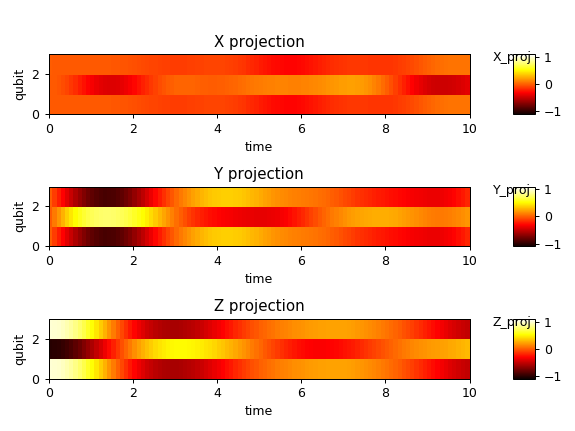

In [7]:
t1, x_exact = time_evolution([x1], create_ising_u, 0.1, 10,
                             J=J, g=g, h=h, keep_intermediary=True, periodic=True)
pl = plot_projections(x_exact, x_axis=t1)

In [21]:
x_unitary = partial(create_ising_u, g=g, periodic=True)
z_unitary = partial(create_ising_u, h=h, J=J, periodic=True)

<IPython.core.display.Javascript object>


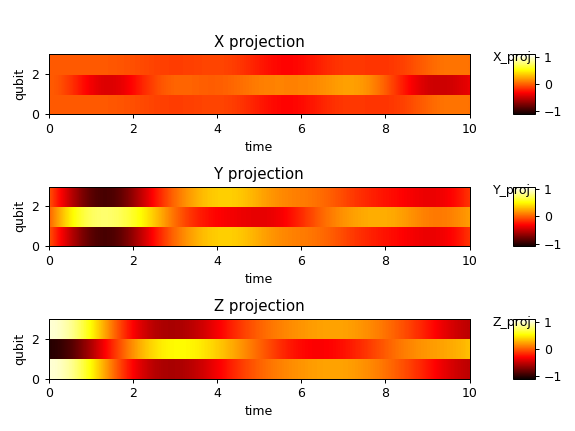

In [22]:
trotter_step_results = [] # step_size, time, state 
trotter_step_result_times = [] # step_size, time
trotter_time_steps = [0.1 / i for i in [1, 2, 4, 8, 16, 32]]
for trotter_time_step in trotter_time_steps:
    t, x = time_evolution_trotter([x1], [x_unitary, z_unitary], trotter_time_step, 10)
    trotter_step_results.append(x[0])
    trotter_step_result_times.append(np.array(t))
pl = plot_projections(trotter_step_results[-1], x_axis=t)

In [23]:
errors = [] # time_step, time 
for i, res in enumerate(trotter_step_results):
    indices = [np.argwhere(np.isclose(trotter_step_result_times[i], x))[0, 0] for
               x in trotter_step_result_times[i] if x in trotter_step_result_times[0]]
    result = np.array([res[i] for i in indices])
    error = np.array([np.linalg.norm(x_exact[0][j] - result[j]) for j in range(len(result))])
    errors.append(error)

<IPython.core.display.Javascript object>


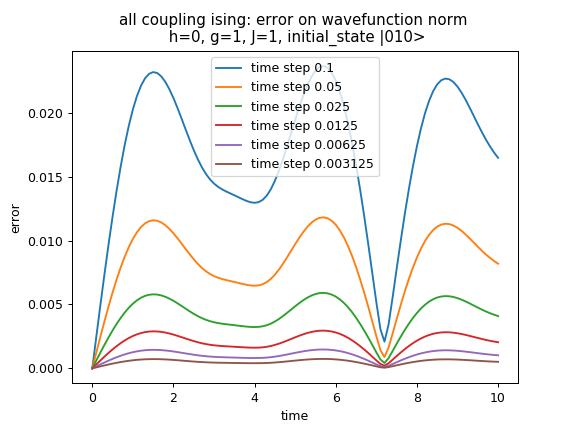

Text(0,0.5,'error')

In [24]:
fig = plt.figure()
for i, error in enumerate(errors):
    plt.plot(trotter_step_result_times[0], error, label='time step {}'.format(trotter_time_steps[i]))
plt.title('all coupling ising: error on wavefunction norm \n h={}, g={}, J={}, '
          'initial_state |{}>'.format(h, g, J, initial_state))
plt.xlabel('time')
plt.legend()
plt.ylabel('error')
# plt.savefig('doubly_extended_ising_qubit_num_{}_h_{}_g_{}_J_{}'.format(qubit_num, h, g, J))

In [93]:
time = 5
index = np.argwhere(np.isclose(trotter_step_result_times[0], time))[0][0]
single_time_result = [errors[i][index] for i in range(len(trotter_time_steps))]

<IPython.core.display.Javascript object>


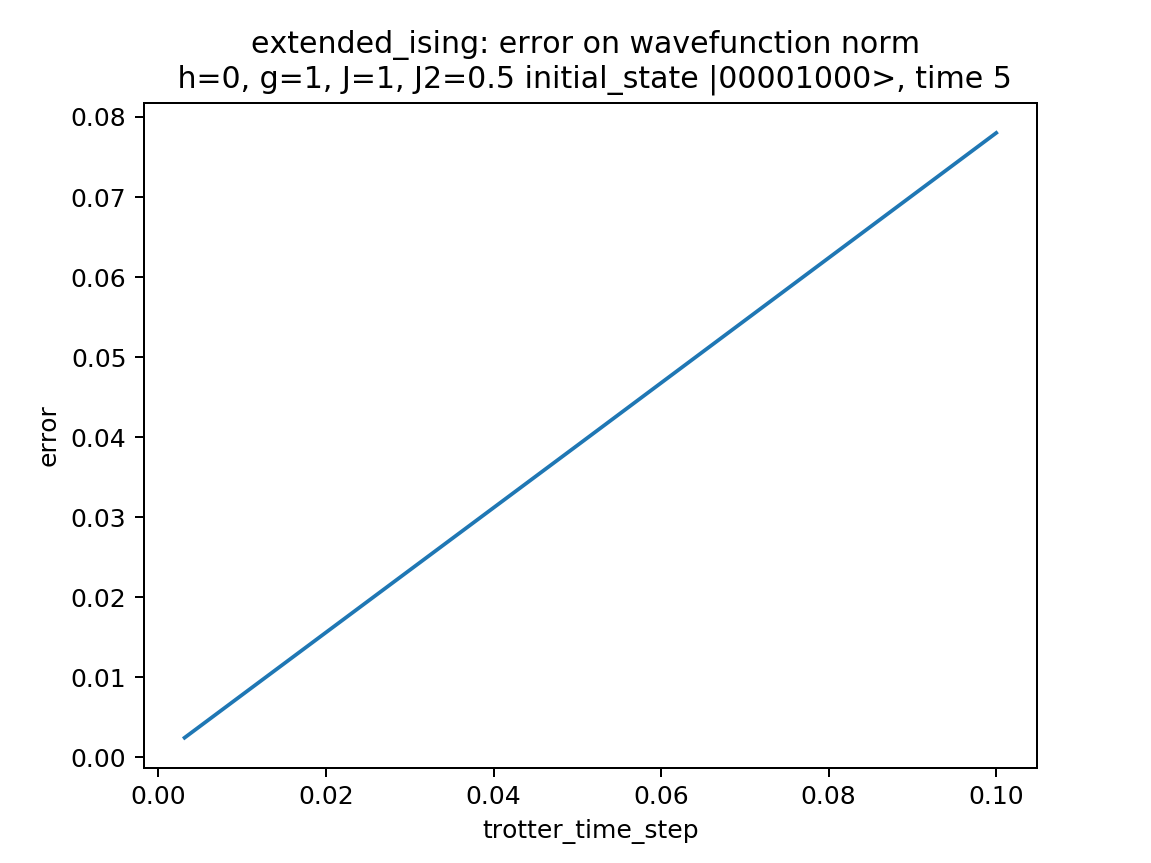

In [94]:
fig = plt.figure()
plt.plot(trotter_time_steps[::-1], single_time_result[::-1])
plt.title('extended_ising: error on wavefunction norm \n h={}, g={}, J={}, J2={} '
          'initial_state |{}>, time {}'.format(h, g, J, J2, initial_state, time))
plt.xlabel('trotter_time_step')
plt.ylabel('error')
plt.savefig('doubly_extended_ising_qubit_num_{}_h_{}_g_{}_J_{}_J2_half_time_{}'.format(qubit_num, h, g, J, time))

In [95]:
m, c = np.polyfit(trotter_time_steps[::-1], single_time_result[::-1], 1)

In [96]:
dict_of_sizes[qubit_num] = m

In [97]:
dict_of_sizes

{3: 0.3257611554428299,
 4: 0.2440121033678952,
 5: 0.336606332371323,
 6: 0.3660515873957146,
 7: 0.5063809542797079,
 8: 0.77999143178641}

In [98]:
keys = dict_of_sizes.keys()
values = dict_of_sizes.values()

<IPython.core.display.Javascript object>


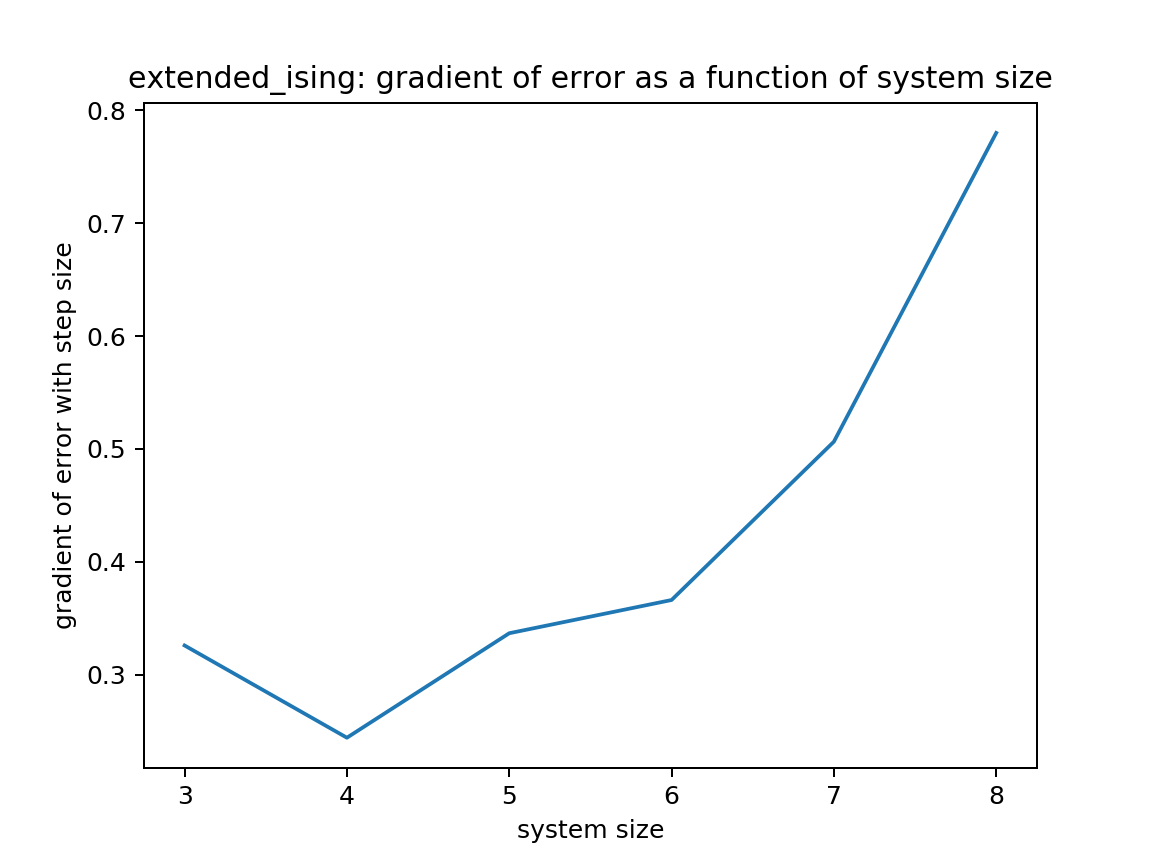

In [100]:
fig = plt.figure()
plt.plot(keys, values)
plt.xlabel('system size')
plt.ylabel('gradient of error with step size')
plt.title('extended_ising: gradient of error as a function of system size')
plt.savefig('doubly_extended_ising_h_{}_g_{}_J_{}_time_{}'.format(qubit_num, h, g, J))

In [44]:
z_projection_errors = [] # time_step, time 
for i, res in enumerate(trotter_step_results):
    indices = [np.argwhere(np.isclose(trotter_step_result_times[i], x))[0, 0] for
               x in trotter_step_result_times[i] if x in trotter_step_result_times[0]]
    result = np.array([res[i] for i in indices])
#     print(result.shape)
    z_projection_error = np.array(projection(result)[:, 0] - projection(x_exact[0])[:, 0])
#     print(z_projection_error.shape)
    z_projection_errors.append(z_projection_error)

<IPython.core.display.Javascript object>


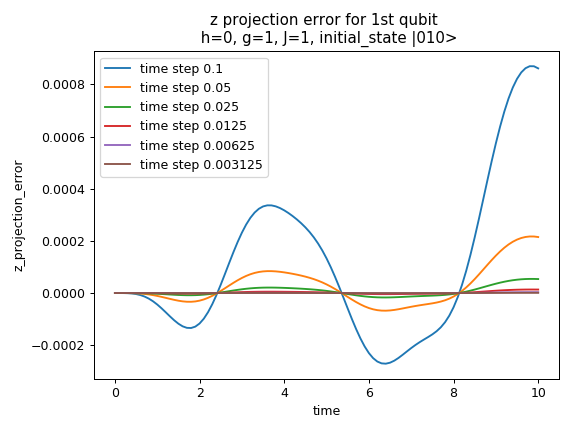

/Users/natalie/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [54]:
fig = plt.figure()
for i, error in enumerate(z_projection_errors):
    plt.plot(trotter_step_result_times[0], error, label='time step {}'.format(trotter_time_steps[i]))
plt.title('z projection error for 1st qubit \n h={}, g={}, J={}, '
          'initial_state |{}>'.format(h, g, J, initial_state))
plt.xlabel('time')
plt.legend();
plt.ylabel('z_projection_error')
plt.tight_layout();
plt.savefig('z_proj_ising_qubit_num_{}_h_{}_g_{}_J_{}'.format(qubit_num, h, g, J))

In [55]:
time = 5
index = np.argwhere(np.isclose(trotter_step_result_times[0], time))[0][0]
single_time_result = [z_projection_errors[i][index] for i in range(len(trotter_time_steps))]

<IPython.core.display.Javascript object>


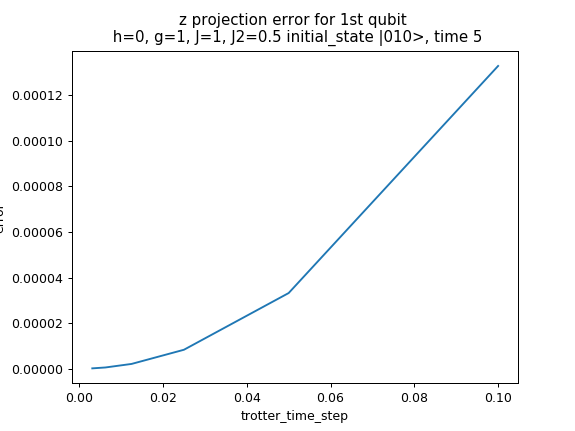

/Users/natalie/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [56]:
fig = plt.figure()
plt.plot(trotter_time_steps[::-1], single_time_result[::-1])
plt.title('z projection error for 1st qubit \n h={}, g={}, J={}, J2={} '
          'initial_state |{}>, time {}'.format(h, g, J, J2, initial_state, time))
plt.xlabel('trotter_time_step')
plt.ylabel('error')
plt.savefig('z_proj_ising_qubit_num_{}_h_{}_g_{}_J_{}_J2_half_time_{}'.format(qubit_num, h, g, J, time))

In [68]:
binary_to_state_vector_index('1111')

15

In [69]:
s = 15

In [89]:
(s >> 4) & 1

0

In [81]:
(s >> 5) & 1

0

In [ ]:
		unsigned si = (s << i) & 1;
		unsigned j = (i + 1) % L;
		unsigned sj = (s << j) & 1;
		energy += (si == sj? -J: J);
	}